In [ ]:
!pip install --upgrade opencv-contrib-python -q
!pip install mediapipe -q

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
img = cv2.imread("/content/run.jpg")

In [ ]:
#Getting the width and height of the image.
img_width = img.shape[1]
img_height = img.shape[0]


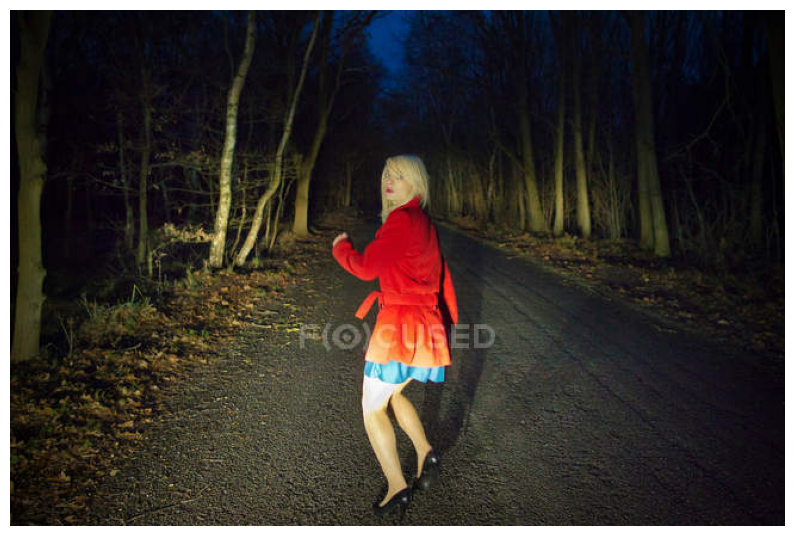

In [ ]:
#Creating a figure and a set of axes.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(img[...,::-1])
plt.show()

In [ ]:
#Initializing MediaPipe's Pose and Drawing modules.
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

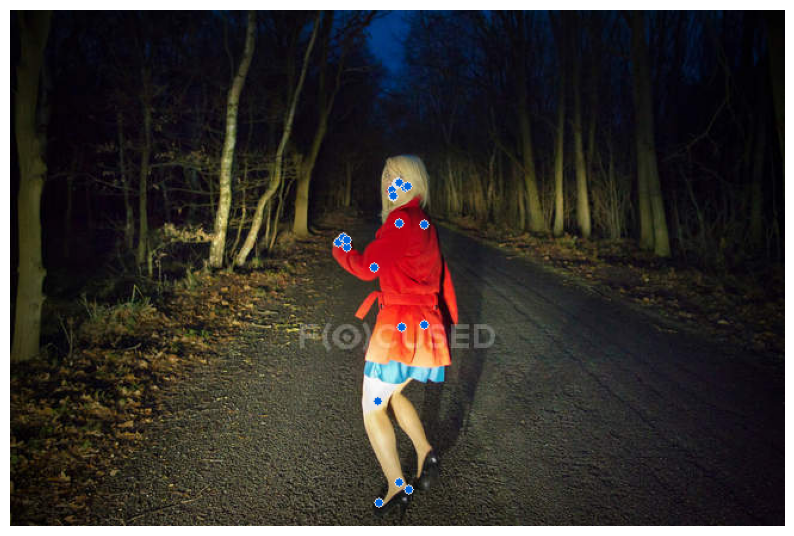

In [ ]:
with mp_pose.Pose(static_image_mode=True) as pose:
  annotated_img = img.copy()
  # Processa a imagem.
  results = pose.process(img)
  #Sets the radius of the circle for drawing 'landmarks'
  #The radius is scaled as a percentage of the image height.
  circle_radius = int(.007 * img_height)
  #Specifies the drawing style of the 'landmarks'.
  point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)
  #Draws the 'landmarks' on the image.
  mp_drawing.draw_landmarks(annotated_img,
                              landmark_list=results.pose_landmarks,
                              landmark_drawing_spec=point_spec)
  #Creates a figure and a set of axes.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(annotated_img[:, :, ::-1])
plt.show()



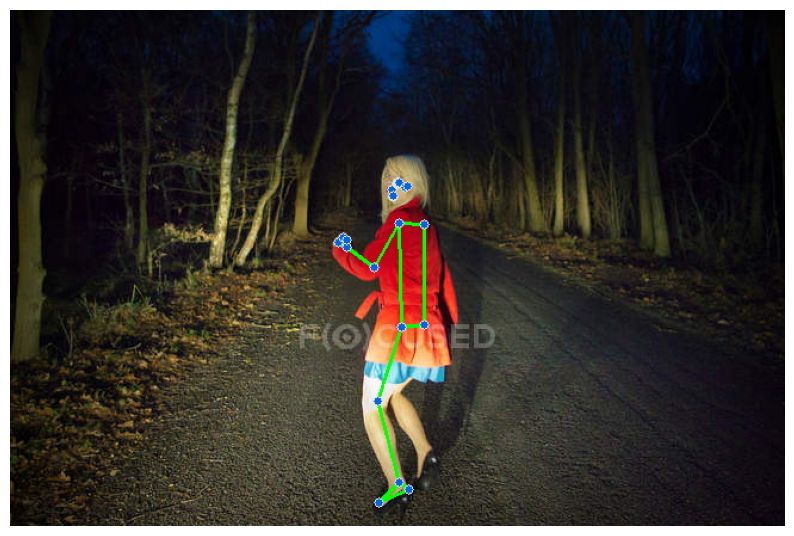

In [ ]:
#Makes a copy of the original image.
annotated_img = img.copy()
#Specifies the drawing style of landmark connections.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
#Draws both landmark points and connections
mp_drawing.draw_landmarks(
    annotated_img,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=point_spec,
    connection_drawing_spec=line_spec
    )
#Creates a figure and a set of axes.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(annotated_img[...,::-1])
plt.show()


In [ ]:
# prompt: get body gestures like standing running

# Assuming 'results' contains the pose landmarks from MediaPipe

def get_body_gesture(results):
  """
  Analyze pose landmarks to determine body gestures.

  Args:
    results: The output of MediaPipe Pose model processing.

  Returns:
    A string describing the detected gesture (e.g., "standing", "running", "unknown").
  """
  if results.pose_landmarks is None:
    return "unknown"

  # Get keypoint coordinates
  landmarks = results.pose_landmarks.landmark

  # Example: Check if the person is running
  # This is a simplified example and requires more robust logic for real-world applications
  if abs(landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y) > 0.1 \
     and abs(landmarks[mp_pose.PoseLandmark.RIGHT_KNEE].y - landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].y) > 0.1:
    return "running"

  # Example: Check if the person is standing
  # This is a simplified example and requires more robust logic for real-world applications
  if landmarks[mp_pose.PoseLandmark.NOSE].y < landmarks[mp_pose.PoseLandmark.LEFT_HIP].y:
    return "standing"



  return "unknown"

# Get the gesture
gesture = get_body_gesture(results)
print(f"Detected gesture: {gesture}")


Detected gesture: running
